#  <center> Taller  de Aprendizaje Automático </center>
##  <center> Taller 3: Demanda de bicicletas compartidas  </center>

# Introducción

En esta actividad se trabajará sobre el *dataset* de la competencia [*Bike Sharing Demand*](https://www.kaggle.com/c/bike-sharing-demand) de *Kaggle*. El objetivo de la competencia, predecir la demanda de bicicletas a partir de la combinación de datos históricos sobre demanda y clima. 

El conjunto corresponde a datos de alquiler por hora y abarcan dos años de información. El subconjunto de *train* está compuesto por los primeros 19 días de cada mes, mientras que el subconjunto de *test* va desde 20 hasta el final del mes. Este último debe ser utilizado solamente en la parte 10 para subir los resultados a la página de la competencia.

En esta actividad nos centraremos en el algoritmo **Decision Trees**, el cual al igual que *SVM* es un algoritmo versatil que se utiliza en problemas tanto de clasificación como de regresión. También trabajaremos con algoritmos basados en métodos de ensamble de estimadores, como son **Random Forest** y **Gradient Boosting**, que utilizan como estimador base **Decision Trees**.


## Objetivos


*   Conocer los estimadores *Decision Trees*, entender cómo funcionan para un problema de regresión, ver ventajas y desventajas.
*   Familiarizarse con los métodos de ensamblado de estimadores y entender cual es el objetivo de usar estos métodos.
*   Incorporar una función de transformación de columnas y una función de medida de desempeño personalizadas.


## Formas de trabajo

#### Opción 1: Trabajar localmente

##### Descarga de datos disponibles en Kaggle

Luego, para descargar el dataset de IMDb reviews:

In [2]:
!kaggle competitions download -c bike-sharing-demand

Descomprima el archivo descargado:

In [3]:
import shutil
shutil.unpack_archive('./bike-sharing-demand.zip', './')

#### Opción 2:  Trabajar en *Colab*. 

Se puede trabajar en Google Colab. Para ello es necesario contar con una cuenta de **google drive** y ejecutar un notebook almacenado en dicha cuenta. De lo contrario, no se conservarán los cambios realizados en la sesión. En caso de ya contar con una cuenta, se puede abrir el notebook y luego ir a `Archivo-->Guardar una copia en drive`. 

La siguiente celda monta el disco personal del drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

A continuación, vaya a su cuenta de [Kaggle](https://www.kaggle.com/) (o cree una si aún no lo ha hecho), haga clic en el icono de perfil en la esquina superior derecha de la pantalla y seleccione "Your Account" en la lista desplegable. Luego, seleccione la viñeta "Account" y haga clic en "Create new API token". Entonces un archivo llamado kaggle.json se descargará automáticamente a su carpeta de descargas. Este archivo contiene sus credenciales de inicio de sesión para permitirle acceder a la API.

La siguiente celda realiza la configuración necesaria para obtener datos desde la plataforma Kaggle. Le solicitará que suba el archivo kaggle.json descargado anteriormente.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from google.colab import files

# El siguiente archivo solicitado es para habilitar la API de Kaggle en el entorno que está trabajando.
# Este archivo se descarga entrando a su perfíl de Kaggle, en la sección API, presionando donde dice: Create New API Token

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

#Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Una vez guardado el *token* se pueden descargar los datos, en este caso se bajarán los datos del dataset IMDb reviews:

In [ ]:
!kaggle competitions download -c bike-sharing-demand

In [ ]:
!unzip bike-sharing-demand.zip

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/TAA-fing/TAA-2024/blob/main/talleres/taller3_demanda_de_bicicletas.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Ejecutar en Google Colab</a>
  </td>
</table>

## Paquetes a utilizar

En esta actividad se utilizarán algunas bibliotecas auxiliares que deberán ser instaladas. Ejecutar la siguiente celda hasta que se ejecute sin errores. En caso de error, se puede instalar el paquete faltante desde el notebook con el comando:

`!pip install paquete_faltante`

In [1]:
#import comet_ml in the top of your file
from comet_ml import Experiment
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
### (Opcional) librería de visualización de datos
#import seaborn as sns
#sns.set_theme(style="whitegrid")

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_submission = pd.read_csv('sampleSubmission.csv')

In [56]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


## Parte 1 - Análisis de los datos

#### Objetivos

 - Analizar el conjunto de datos con las diferentes funciones de *pandas* que crea pertinente.

In [2]:
print(df_train.head())
print('------------------------------')
print(len(df_train['season'] == 4))
print(len(df_train['season'] == 1))
print(len(df_train['season'] == 2))
print(len(df_train['season'] == 3))
print('------------------------------')
dato = df_train.corr(numeric_only=True)['season']
print(dato)
print('------------------------------')
dato = df_train.corr(numeric_only=True)['weather']
print(dato)
print('------------------------------')
print('Humedad Media',df_train['humidity'].mean())
print('------------------------------')



              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  
------------------------------
10886
10886
10886
10886
------------------------------
season        1.000000
holiday       0.029368
workingday   -0.008126
weather       0.008879
temp          0.258689
atemp         0.26

#### Preguntas:

 - ¿Qué efecto tiene el tiempo (meteorológico) sobre el alquiler de bicicletas? ¿Es el mismo para clientes registrados y casuales? ¿Coincide esto con lo que asumiría a priori? 
 - Vamos a trabajar con las codificaciones por defecto (salvo datetime que veremos en la Parte 2). ¿Le parece adecuado?
 - ¿Qué puede decir sobre la correlación entre *season* y *casual*?


<p style="font-size:13px; color:#BB0000;">Respuesta a preguntas </p>

## Parte 2 - Características temporales

La primer columna de los datos (*datetime*) corresponde a las marcas de tiempo asociadas a cada instancia. Para que estos tengan el orden cronológico que representan es necesario pasarlos de tipo *string* a tipo *datetime*. Para esto *Pandas* proporciona la función *to_datetime()*. Correr la siguiente celda para hacer el cambio.

In [3]:
df_train['datetime'] = pd.to_datetime(df_train['datetime'])

##### La figura siguiente muestra cómo varía la cantidad de bicicletas alquiladas en función del tiempo. 

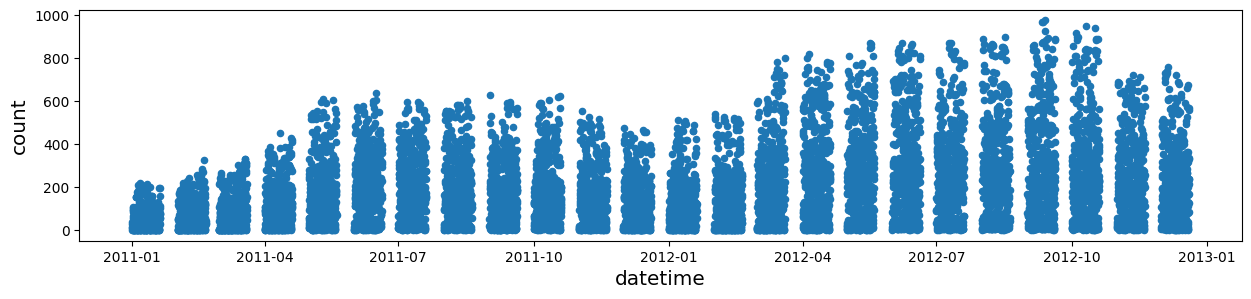

In [4]:
df_train.plot(x='datetime', y='count', figsize=[15,3],kind='scatter',color='tab:blue')
plt.xlabel('datetime',fontsize='x-large')
plt.ylabel('count',fontsize='x-large')
plt.show()

#### Preguntas:

- ¿Le parece razonable la division en conjuntos de train y test que se tomó en el desafío?
- ¿Cómo varían temporalmente (día, semana, mes, año) los alquileres?

<p style="font-size:13px; color:#BB0000;">Respuesta a preguntas </p>

In [5]:
No, ya que no tener nunca la informacion de las bicicletas a fin de mes, nos puede sacar información valiosa. Ejemplo a fin de mes la gente puede tener tendencia a usar más el tren que alquilar una bici o ir caminando

SyntaxError: invalid syntax (3193747574.py, line 1)

El tipo de dato *datetime* permite extraer de forma sencilla datos categóricos como la hora, el día de la semana, entre otros. La siguiente celda agrega a los datos de *train* estas nuevas características.

In [5]:
df_train['hour'] = df_train['datetime'].dt.hour
df_train['weekday'] = df_train['datetime'].dt.weekday

df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5


#### Ejercicio:

 - Grafique count, registered y casual en función de las horas y el día de la semana. ([*Sugerencia:*](https://seaborn.pydata.org/generated/seaborn.barplot.html) Ejemplos de la librería *seaborn*)

<Axes: xlabel='hour', ylabel='count'>

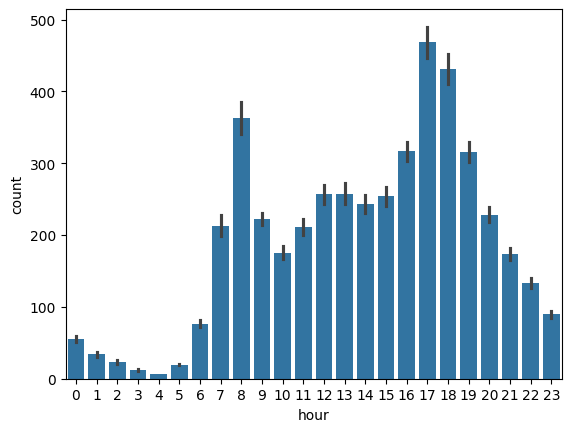

In [6]:
sns.barplot(df_train, x='hour', y='count')


<Axes: xlabel='weekday', ylabel='count'>

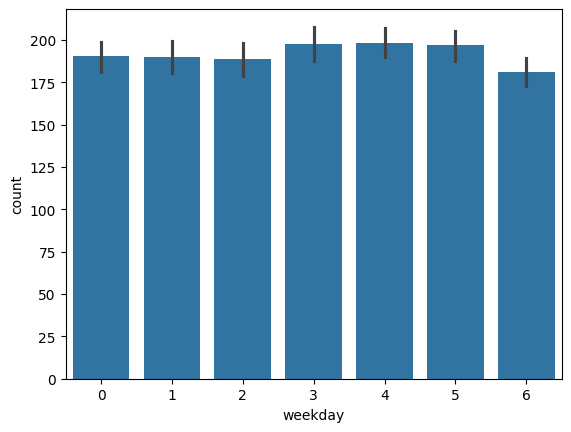

In [8]:
sns.barplot(df_train, x='weekday', y='count')


<Axes: xlabel='weekday', ylabel='registered'>

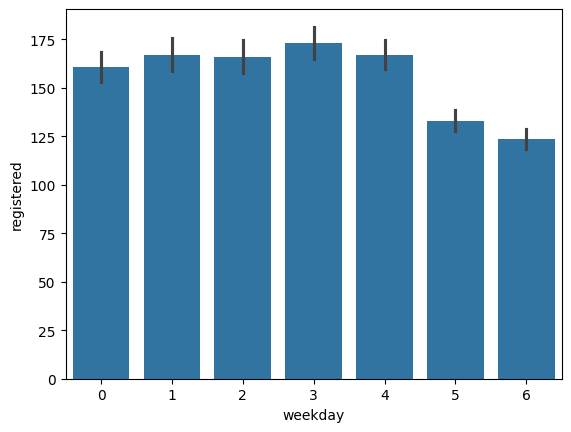

In [9]:
sns.barplot(df_train, x='weekday', y='registered')

<Axes: xlabel='hour', ylabel='registered'>

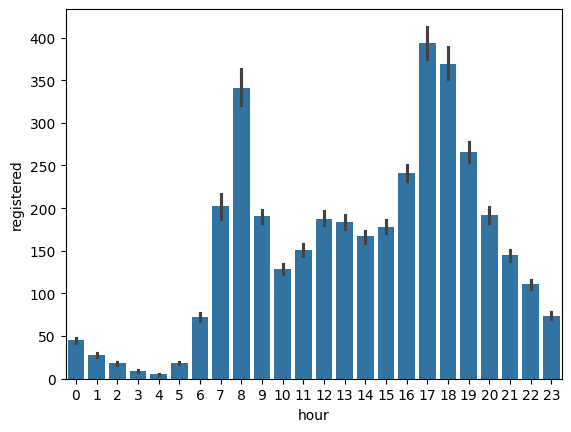

In [10]:
sns.barplot(df_train, x='hour', y='registered')

<Axes: xlabel='hour', ylabel='casual'>

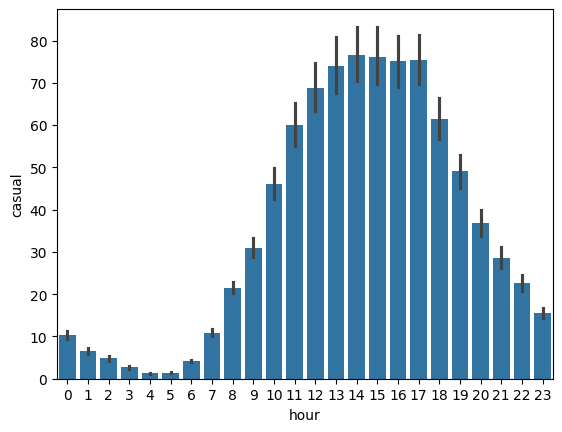

In [11]:
sns.barplot(df_train, x='hour', y='casual')

<Axes: xlabel='weekday', ylabel='casual'>

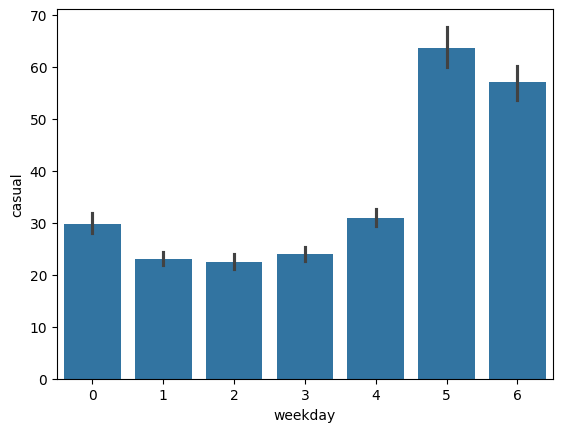

In [12]:
sns.barplot(df_train, x='weekday', y='casual')

##### A partir de las gráficas responder las siguientes preguntas:

 - ¿Cómo explicaría la diferencia entre las distribuciones de los clientes registrados y casuales? 
 - ¿Qué desventaja le encuentra a utilizar un regresor lineal para predecir los alquileres a partir de la hora del día?¿Cómo transformaría esta característica para paliar este problema?
 - ¿Es necesaria esta transformación cuando se utilizan Árboles de Decisión?

In [ ]:
Los registrados usan mas las bicis entre semana mientras que los casuales los findes, esto se puede deber a que los regitrados son los que usarn regularmente las bicis para ir al trabajo o para hacer sus cosas, mientras que los casuales usan las bicis para pasear, ocio. Por eso se puede deber la tendencia ausarla solo los findes.

Usar un regresor lineal estaria mal, ya que hay una clara tendencia a no usar las bicis de madrugada, practicamente no se usan las bicis entre las 12pm y 6am

#### Selección de Características:

*   Entre el día, el mes y el año ¿cuáles de estos datos les pareces agregar como nuevas características y cuáles no? y ¿Por qué?
*   Agregar las características seleccionadas.

In [ ]:
Solo el mes, ya que entre si es lunes, martes, miercoles,jueves o viernes, nos importa mas si es working day en relacion a los registrados y casuales. y el a;o no importa, ya que hay una diferencia entre uno y otro pero no cambia tanto la curva.



In [13]:
df_train.columns.tolist()

['datetime',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count',
 'hour',
 'weekday']

In [7]:
columnas_a_eliminar = ['weekday','datetime','humidity']
df_train = df_train.drop(columns=columnas_a_eliminar)
df_train.columns.tolist()

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'windspeed',
 'casual',
 'registered',
 'count',
 'hour']

## Parte 3 - Preparación de los datos y Métrica de evaluación

Previo a trabajar con los estimadores:

*   Apartar la columna objetivo y eliminarla del conjunto de entrenamiento. 
*   Eliminar las columnas *'casual'* y *'registered'*. ¿Por qué esto es necesario?.
*   Eliminar la columna *'datetime'*.

Durante la actividad los estimadores deben ser evaluados con la misma medida de desempeño utilizada en la competencia: 

Root Mean Squared Logarithmic Error (RMSLE)
$$\sqrt{\frac{1}{n}\sum_{i}^{n}\big(\log(y_{i} + 1) - \log(\hat{y}_{i} + 1)\big)^2}$$

Este tipo de medida se utiliza cuando los valores a estimar son grandes. La librería *Scikit-Learn* incluye la función de desempeño [*mean_squared_log_error*](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html#sklearn.metrics.mean_squared_log_error) (MSLE), esta función se puede utilizar  para la validación ya que alcanza las mismas soluciones que su raíz (RMSLE). De igual forma los resultados se deben mostrar con RMSLE.

In [8]:
y_train = df_train['count']

X_train = df_train.drop(columns=['count','casual','registered'])
X_train.columns.tolist()



['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'windspeed',
 'hour']

## Parte 4 - Decision Trees

### TransformedTargetRegressor

Observando los valores de las etiquetas se puede ver que la distribución de estos tiene una asimetría a la derecha, por lo que se puede aplicar una transformación logarítmica para que la distribución de las etiquetas sea más normal.

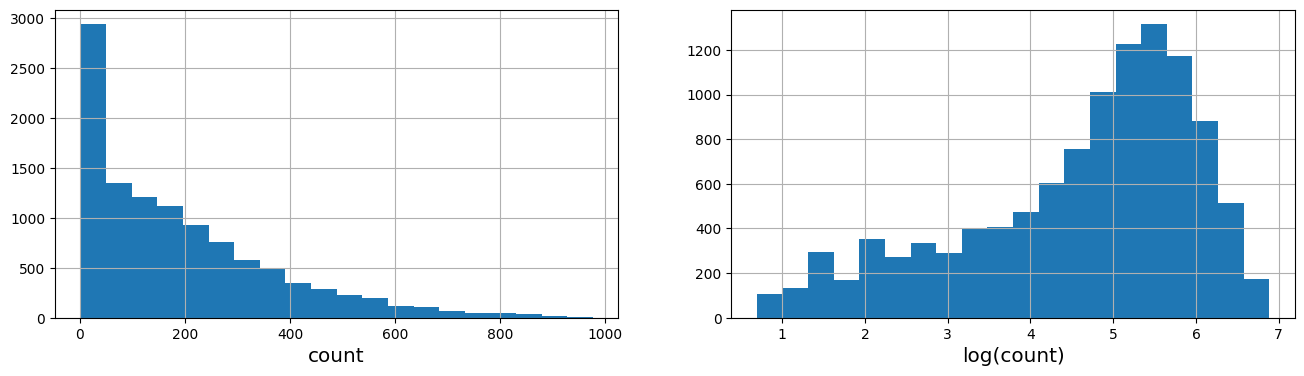

In [9]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
y_train.hist(bins=20)
plt.xlabel('count',fontsize='x-large')
plt.subplot(1,2,2)
np.log1p(y_train).hist(bins=20)
plt.xlabel('log(count)',fontsize='x-large')
plt.show()

Si le pasamos al regresor estas etqiquetas tranformadas este predecirá el logaritmo de los alquileres, por lo que luego deberíamos calcular la exponencial del valor predicho. Por suerte, Scikit-Learn cuenta con la función [TransformedTargetRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.compose.TransformedTargetRegressor.html) que resuelve este problema.

**Nota: Consultar el Capítulo 2 del Libro del Curso por más información**

#### Objetivos

*   Importar la función *DecisionTreeRegressor()* de *Scikit-Learn* y utilizar *TransformedTargetRegressor* para tranformar logarítmicamente las etiquetas. Utilizar las funciones ***np.log1p*** y ***np.expm1*** para calcular el logaritmo y la exponencial respectivamente (ver ejemplo en ayuda de la función *TransformedTargetRegressor*).
*   Aplicar validación cruzada (10-Folds) a un estimador con los hiper-parámetros por defecto.
*   Graficar los valores de RMSLE de entrenamiento y validación. Calcular la media y la desviación estandar e incluir esta última en el gráfico. Para lo último utilizar la función *fill_between()* de *matplotlib*. 

**Nota:** Puede pasarle ***random-state=2*** al estimador,*DecisionTreeRegressor()*,  para controlar la aleatoreidad del mismo. De no hacerlo puede que los resultados que obtenga difieran en cierta medida de los esperados.

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_log_error
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

regressor = TransformedTargetRegressor(regressor=DecisionTreeRegressor(random_state=2),func=np.log1p, inverse_func=np.expm1)

score = cross_validate(regressor, X_train, y_train, cv=10,scoring='neg_root_mean_squared_log_error', return_train_score=True)

rmsle_train = -score['train_score']
rmsle_val = -score['test_score']


mean_rmsle_train = np.mean(rmsle_train)  
std_rmsle_train = np.std(rmsle_train)

mean_rmsle_val = np.mean(rmsle_val)
std_rmsle_val = np.std(rmsle_val)

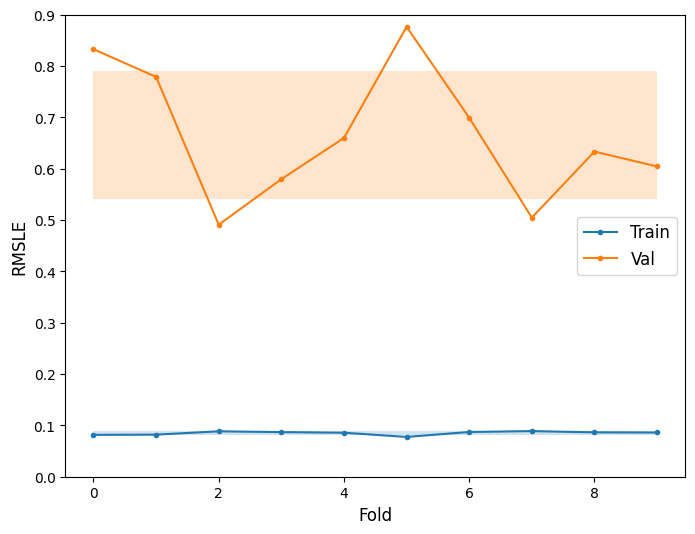

In [11]:
### Ayuda de Gráfica
## Se crea la figura
plt.figure(figsize=(8,6))

## Se grafican los valores de RMSLE de entrenamiento y validación
plt.plot( rmsle_train , '.-',color='tab:blue',label='Train')
plt.plot( rmsle_val , '.-',color='tab:orange',label='Val')

## Se grafica la media y desviación etándar
plt.fill_between(np.arange(10), mean_rmsle_train + std_rmsle_train, mean_rmsle_train - std_rmsle_train, alpha=0.2)
plt.fill_between(np.arange(10), mean_rmsle_val + std_rmsle_val, mean_rmsle_val - std_rmsle_val, alpha=0.2)

plt.xlabel('Fold',fontsize='large')
plt.ylabel('RMSLE',fontsize='large')
plt.legend(fontsize='large')
plt.ylim([0,0.9])
plt.show()

#### Preguntas:

*   ¿Qué fenómeno se logra apreciar en el gráfico? ¿A qué se debe? ¿Por qué esto es un problema?
*   Indicar y describir alguno de los hiper-parámetros que la función *DecisionTreeRegressor()* ofrece para limitar la complejidad del estimador.

In [ ]:
Se describiria un sobreajuste de los dato, ya que Error train es muy bajo y Error Xval

Max features, masx leaf nodes, max depth

#### Ejemplo Lack of smoothness

Como ejemplo se tomará la siguiente situación:

 - Domingo 
 - Despejado o Parcialmente nublado
 - A las 19 horas 
 - En primavera 
 
Se observará el efecto de la temperatura en la predicción de alquileres de bicicletas.

 - ¿Cómo espera que sea dicho efecto en un rango de 10°C a 30°C?

In [12]:
index = 2685
Domingo = df_train.iloc[index:index+1]
Domingo

,season,holiday,workingday,weather,temp,atemp,windspeed,casual,registered,count,hour
2685,2,0,0,1,29.52,34.09,8.9981,94,217,311,19


In [13]:
## Se crea un dataframe con los datos del domingo
X_prueba = pd.concat([Domingo]*21,ignore_index=True)

index = 0
for k in np.linspace(10,30,21):
    X_prueba.loc[index,'temp']= k
    ## De igual manera se cambia la sensación térmica para mantener cierta coherencia
    X_prueba.loc[index,'atemp']= k
    index += 1

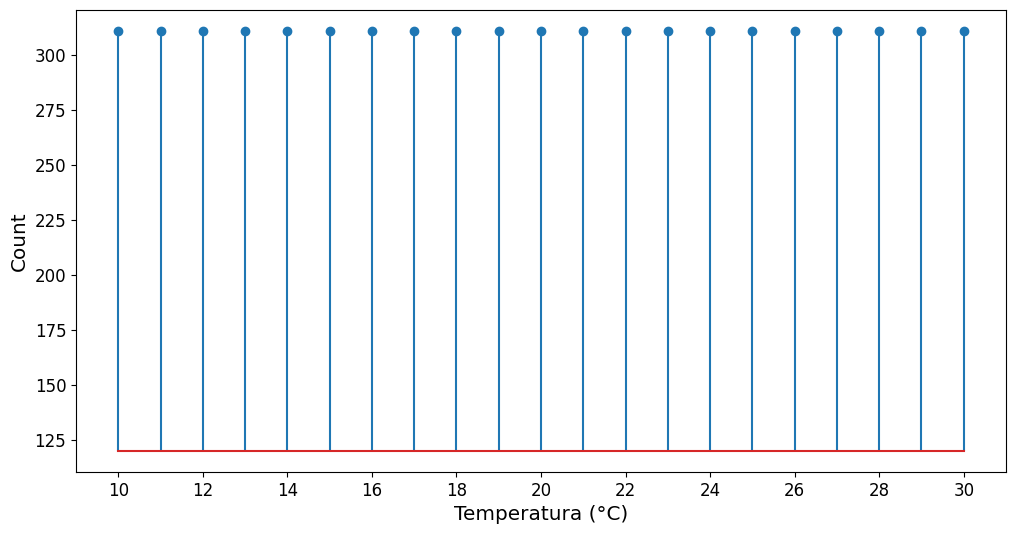

In [14]:
## regressor es el nombre de la variable que contiene el modelo de arbol de decisión
regressor.fit(df_train,y_train)

plt.figure(figsize=(12,6))
plt.stem(np.linspace(10,30,21),regressor.predict(X_prueba),bottom=120)
plt.xlabel('Temperatura (°C)',fontsize='x-large')
plt.ylabel('Count',fontsize='x-large')
plt.xticks(np.linspace(10,30,11),fontsize='large')
plt.yticks(fontsize='large')
plt.savefig('cambios_temp.png')
plt.show()

 - Observe el cambio que genera la temperatura a la salida (en particular el pasar de una temperatura de 23°C a 24°C, puede variar según la semilla, ver **Nota**).
 
 - ¿Qué desventaja le encuenta a los árboles de decisión en comparación con modelos lineales?

 **Nota:** Debido a la alta varianza de los Árboles de decisión los modelos obtenidos pueden variar de gran manera a efecto de pequeños cambios en el entrenamiento. En la carpeta se adjunta la imagen *cambios_temp.png* para que pueda discutir las preguntas a partir de la figura que se espera obtener.

### Ajuste Fino

#### Objetivos

*   Seleccionar uno de los hiper-parámetros y encontrar el mejor estimador.
*   Graficar los valores de RMSLE de entrenamiento y validación. Calcular la media y la desviación estandar e incluir esta última en el gráfico. Comparar con los resultados anteriores.
*   Graficar cómo varían los valores de RMSLE de entrenamiento y validación, para diferentes valores del hiper-parámetro.
*   Mostrar el mejor valor RMSLE (promedio de todos los *folds*) y el valor del hiper-parámetro.
*   Visualizar el árbol hasta los nodos de profundidad 2 utilizando la función *plot_tree()*. Agrandar el tamaño de la imagen de manera de poder leer la descripción de cada nodo.
*   Analizar las decisiones que está tomando el árbol para los primeros nodos.
*   Graficar los primeros 200 valores objetivo junto con sus predicciones.

**Nota:** Puede ser útil la función *save_gs_results()* que se encuentra en el archivo *comet_log.py* de la carpeta del taller para organizar sus experimentos con Comet.

In [23]:
from sklearn.metrics import mean_squared_log_error, make_scorer
import numpy as np

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, np.maximum(0, y_pred)))

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

In [26]:
from sklearn.model_selection import GridSearchCV

diccionario = {
    'regressor__max_depth': [5,8,10,12,14,15,20],
    'regressor__min_samples_split' : [2,4,6,8,10],
    'regressor__min_samples_leaf': [1,2,4,8,12],
    'regressor__max_features': ['sqrt', 'log2', None]
    }
TT_regressor = TransformedTargetRegressor(
    regressor=DecisionTreeRegressor(random_state=2),
    func=np.log1p, inverse_func=np.expm1
)

grid_search = GridSearchCV(estimator=TT_regressor, param_grid=diccionario, cv=5, scoring=rmsle_scorer)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_depth = grid_search.best_params_['regressor__max_depth']

print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor score RMSLE:", -grid_search.best_score_)

Mejores hiperparámetros: {'regressor__max_depth': 10, 'regressor__max_features': None, 'regressor__min_samples_leaf': 12, 'regressor__min_samples_split': 2}
Mejor score RMSLE: 0.6087007236395622


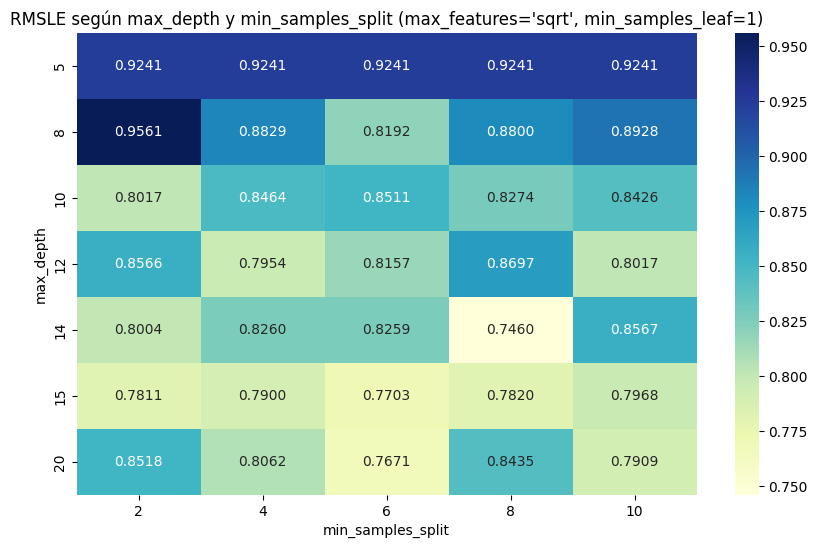

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Armar el DataFrame con los resultados
df = pd.DataFrame(grid_search.cv_results_['params'])
df['mean_test_score'] = grid_search.cv_results_['mean_test_score']  # negativo por rmsle_scorer

# Filtramos por un valor fijo para que el heatmap tenga sentido
df_filtrado = df[df['regressor__max_features'] == 'sqrt']
df_filtrado = df_filtrado[df_filtrado['regressor__min_samples_leaf'] == 1]

# Pivotamos para el heatmap
pivot = df_filtrado.pivot(
    index='regressor__max_depth',
    columns='regressor__min_samples_split',
    values='mean_test_score'
)

# Graficamos
plt.figure(figsize=(10,6))
sns.heatmap(-pivot, annot=True, fmt=".4f", cmap="YlGnBu")  
plt.title("RMSLE según max_depth y min_samples_split (max_features='sqrt', min_samples_leaf=1)")
plt.xlabel("min_samples_split")
plt.ylabel("max_depth")
plt.show()


In [27]:
best_regressor = TransformedTargetRegressor(regressor= best_model,func=np.log1p, inverse_func=np.expm1)

score2 = cross_validate(best_regressor, X_train, y_train, cv=10,scoring= rmsle_scorer, return_train_score=True)

rmsle_train2 = -score2['train_score']
rmsle_val2 = -score2['test_score']


mean_rmsle_train2 = np.mean(rmsle_train2)  
std_rmsle_train2 = np.std(rmsle_train2)

mean_rmsle_val2 = np.mean(rmsle_val2)
std_rmsle_val2 = np.std(rmsle_val2)


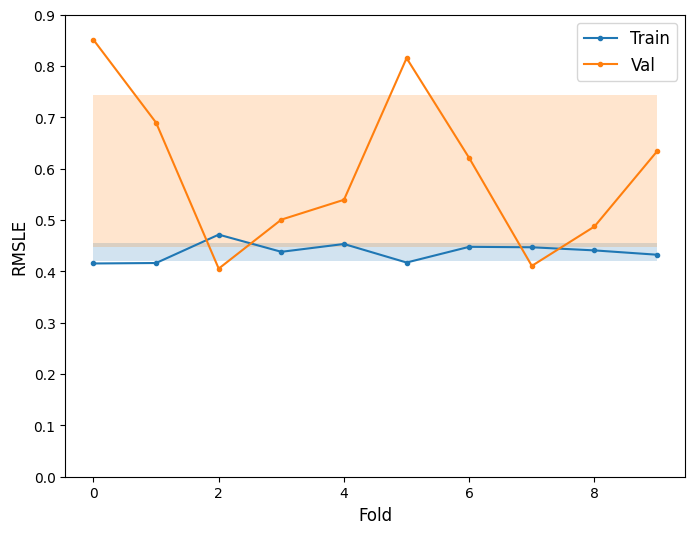

In [28]:
plt.figure(figsize=(8,6))

## Se grafican los valores de RMSLE de entrenamiento y validación
plt.plot( rmsle_train2 , '.-',color='tab:blue',label='Train')
plt.plot( rmsle_val2 , '.-',color='tab:orange',label='Val')

## Se grafica la media y desviación etándar
plt.fill_between(np.arange(10), mean_rmsle_train2 + std_rmsle_train2, mean_rmsle_train2 - std_rmsle_train2, alpha=0.2)
plt.fill_between(np.arange(10), mean_rmsle_val2 + std_rmsle_val2, mean_rmsle_val2 - std_rmsle_val2, alpha=0.2)

plt.xlabel('Fold',fontsize='large')
plt.ylabel('RMSLE',fontsize='large')
plt.legend(fontsize='large')
plt.ylim([0,0.9])
plt.show()

## Parte 5 - Random Forest

#### Preguntas sobre métodos de Ensamble:

*   ¿Cuáles son las ventajes de los métodos de Ensamble?
*   ¿A qué métodos de ensamble está asociado *Random Forest*?.
*   Importar la función *RandomForestRegressor()* de *Scikit-Learn*.
*   Indicar y describir los principales hiper-parámetros correspondientes a los métodos de ensamble que ofrece la función.




In [ ]:
Los metodos de ensamble combinan muchos modelos para mejorar el modelo final.Mayor precision, reducen el overfitting(bagging boosting)
Random forest esta basado en bagging. entrena muchos arboles de decision en subconjuntos de datos muestreados y hace una votacion mayoritaria para clasificar

In [18]:
from sklearn.ensemble import RandomForestRegressor

#### Ajuste fino



*   Encontrar el mejor estimador para *Random Forest* usando como estimador base el encontrado en la parte 4.
*   Graficar los valores de RMSLE de entrenamiento y validación. Calcular la media y la desviación estandar e incluir esta última en el gráfico. Comparar con los resultados correspondientes de la parte 4.
*   Mostrar el mejor valor de RMSLE (promedio de todos los folds) y compararlo con el de la parte 4. Mostrar los valores seleccionados de los hiper-parámetros.
*   ¿Qué ventaja se pierde con repecto a usar un sólo árbol?
*   Graficar los primeros 200 valores objetivo junto con sus predicciones. Comparar con el gráfico correspondiente de la parte 4.
*   Mostrar la importancia de cada característica utilizando la variable *feature_importances_*.



In [19]:
diccionario = {
    'max_depth': [5,8,10,12,15,20],
    'n_estimators' : [10,50,100,150,200,250,300]
    }

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=2), param_grid=diccionario, cv=10)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_depth = grid_search.best_params_['max_depth']
best_n = grid_search.best_params_['n_estimators']

print(f"Mejor valor de depth: {best_depth}")
print(f"Mejor valor de n: {best_n}")
print(f"Mejor precisión obtenida: {grid_search.best_score_:.4f}")

Mejor valor de depth: 12
Mejor valor de n: 300
Mejor precisión obtenida: 0.3699


In [34]:
results = pd.DataFrame(grid_search.cv_results_)
print(results.columns)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_regressor__max_depth', 'param_regressor__max_features',
       'param_regressor__min_samples_leaf',
       'param_regressor__min_samples_split', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


In [22]:
diccionario2 = {
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 10, 15, 30]
    }


best_rf = RandomForestRegressor(max_depth=best_depth, n_estimators=best_n,n_jobs=-1,random_state=2)

grid_search2 = GridSearchCV(estimator=best_rf, param_grid=diccionario2, cv=10)

grid_search2.fit(X_train, y_train)

best_model2 = grid_search2.best_estimator_
best_leaf = grid_search2.best_params_['min_samples_leaf']
best_sample = grid_search2.best_params_['min_samples_split']

print(f"Mejor valor de leaf: {best_leaf}")
print(f"Mejor valor de sample: {best_sample}")
print(f"Mejor precisión obtenida: {grid_search2.best_score_:.4f}")

Mejor valor de leaf: 10
Mejor valor de sample: 2
Mejor precisión obtenida: 0.3869


In [58]:
best_params2 = grid_search2.best_params_

In [21]:

score3 = cross_validate(best_model2, X_train, y_train, cv=10, return_train_score=True)

rmsle_train3 = score3['train_score']
rmsle_val3 = score3['test_score']


mean_rmsle_train3 = np.mean(rmsle_train3)  
std_rmsle_train3 = np.std(rmsle_train3)

mean_rmsle_val3 = np.mean(rmsle_val3)
std_rmsle_val3 = np.std(rmsle_val3)

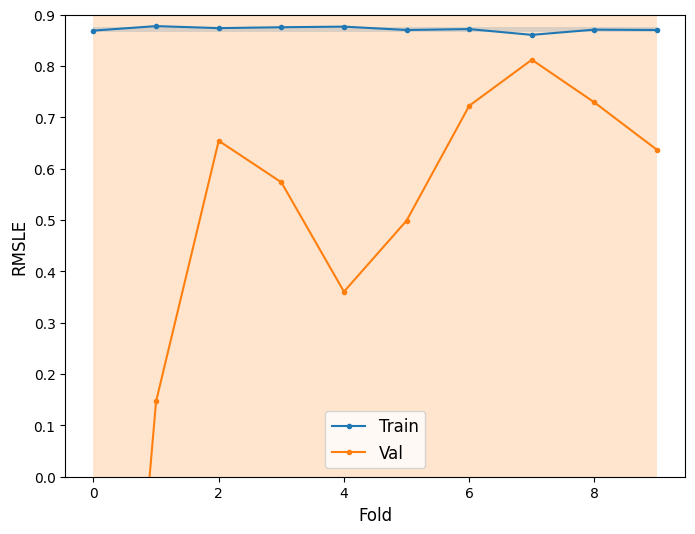

In [65]:
plt.figure(figsize=(8,6))

## Se grafican los valores de RMSLE de entrenamiento y validación
plt.plot( rmsle_train3 , '.-',color='tab:blue',label='Train')
plt.plot( rmsle_val3 , '.-',color='tab:orange',label='Val')

## Se grafica la media y desviación etándar
plt.fill_between(np.arange(10), mean_rmsle_train3 + std_rmsle_train3, mean_rmsle_train3 - std_rmsle_train3, alpha=0.2)
plt.fill_between(np.arange(10), mean_rmsle_val3 + std_rmsle_val3, mean_rmsle_val3 - std_rmsle_val3, alpha=0.2)

plt.xlabel('Fold',fontsize='large')
plt.ylabel('RMSLE',fontsize='large')
plt.legend(fontsize='large')
plt.ylim([0,0.9])
plt.show()

In [41]:
score = cross_validate(best_model2,X_train,y_train,cv=10,scoring=rmsle_scorer)
print(score, score['test_score'].mean()*-1)

{'fit_time': array([1.65872121, 1.14918351, 1.17505956, 1.15963531, 1.23065686,
       1.18306518, 1.21664095, 1.20910239, 1.20201135, 1.15916085]), 'score_time': array([0.08500743, 0.08476019, 0.07300687, 0.08432341, 0.07246065,
       0.07351303, 0.07300639, 0.07200742, 0.0720067 , 0.08423805]), 'test_score': array([-0.86639312, -0.72989977, -0.39408057, -0.5173107 , -0.58422168,
       -0.60156049, -0.46758375, -0.35648466, -0.40205583, -0.50300826])} 0.5422598836724262


## Parte 6 - Gradient Boosting

#### XGBoost

*   Indicar cuál es la principal diferencia entre *Bagging* y *Boosting*.
*   Importar la función *XGBRegressor()* de la librería [*xgboost*](https://github.com/dmlc/xgboost).
*   Este estimador a diferencia de los anteriores puede devolver predicciones negativas para estos datos. Indicar en que caso se pueda dar esto y por qué esto no sucedía con los estimadores anteriores.
*   Las predicciones negativas no pueden ser evaluadas por RMSLE. Por lo tanto, crear una nueva función de evaluación que fuerce a cero todos los valores negativos de las predicciones y luego calcule el valor de RMSLE. Para esto se debe utilizar la función *make_score* de *Sickit-Learn*, para que la nueva función pueda ser utilizada en las funciones de selección de modelos.


**Nota:** *Scikit-Learn* ofrece una implementación de *Gradient Boosting*, pero *XGBRegressor()* es la implementación de [*eXtreme Gradient Boosting*](https://arxiv.org/pdf/1603.02754.pdf?__hstc=133736337.1bb630f9cde2cb5f07430159d50a3c91.1513641600097.1513641600098.1513641600099.1&__hssc=133736337.1.1513641600100&__hsfp=528229161) un variante del algoritmo tradicional que dentro de algunas ventajas requiere menos tiempo de entrenamiento. La implementación de las funciones de la librería son muy similares a las de *Scikit-Learn*, de igual forma aquí le dejamos un [ejemplo](https://www.kaggle.com/alexisbcook/xgboost) de cómo usarla. 







**Nota:** A partir de la versión **0.21** *Scikit-Learn* también ofrece una implementación de *Gradient Boosting* optimizada para data-sets grandes: [Histogram-based Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html). Su funcionamiento se basa en agrupar en *bins* a los features de entrada, remplazandolos por integers. El número de *bins* es controlado por el hiperparámetro *max_bins*, el cual por defecto toma el valor 255 y no puede ser seteado a un valor mayor que este. En el Capítulo 7 del libro se encuentra más información acerca de este algoritmo. 

In [49]:
#EL bagging entrena multiples modelos en paralelo con diferentes subconjuntos de datos, reduce la varianza y evita el sobreajuste.
#Mientras que el boosting entrena modelos secuencialmente donde cada modelo intenta corregir errores del anterior

from xgboost import XGBRegressor

#### Ajuste fino



*   Encontrar el mejor estimador para *Gradient Boosting* usando como estimador base el encontrado en la parte 4.
*   Graficar los valores de RMSLE de entrenamiento y validación. Calcular la media y la desviación estandar e incluir esta última en el gráfico. Comparar con los gráficos correspondientes.
*   Mostrar el mejor valor de RMSLE (promedio de todos los folds) y compararlo con los anteriores. Mostrar los valores seleccionados de los hiper-parámetros.
*   Graficar los primeros 200 valores objetivo junto con sus predicciones. Comparar con los gráficos corespondientes.
*   ¿Qué compromiso hay entre los hiper-parámetros *n_estimators* y *learning_rate*?



In [75]:
from sklearn.metrics import mean_squared_log_error, make_scorer

def rmsle_adjusted(y_true, y_pred):
    y_pred = np.maximum(y_pred, 0)  # Forzar valores negativos a cero
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

rmsle_scorer = make_scorer(rmsle_adjusted, greater_is_better=False)

param_grid = {
    "n_estimators": [50, 100, 200, 300],  
    "learning_rate": [0.01, 0.05, 0.1, 0.2]  
}

xgb_model = XGBRegressor(objective="reg:squarederror", random_state=2)


grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=rmsle_scorer,
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


best_model4 = grid_search.best_estimator_
best_params = grid_search.best_params_
best_rmsle = grid_search.best_score_  

print(f"Mejor RMSLE con XGBoost: {best_rmsle:.4f}")
print(f"Mejores hiperparámetros: {best_params}")



Mejor RMSLE con XGBoost: -0.6217
Mejores hiperparámetros: {'learning_rate': 0.1, 'n_estimators': 50}


In [76]:
score4 = cross_validate(best_model4, X_train, y_train, cv=10, return_train_score=True,scoring=rmsle_scorer)

rmsle_train4 = -score4['train_score']
rmsle_val4 = -score4['test_score']


mean_rmsle_train4 = np.mean(rmsle_train4)  
std_rmsle_train4 = np.std(rmsle_train4)

mean_rmsle_val4 = np.mean(rmsle_val4)
std_rmsle_val4 = np.std(rmsle_val4)

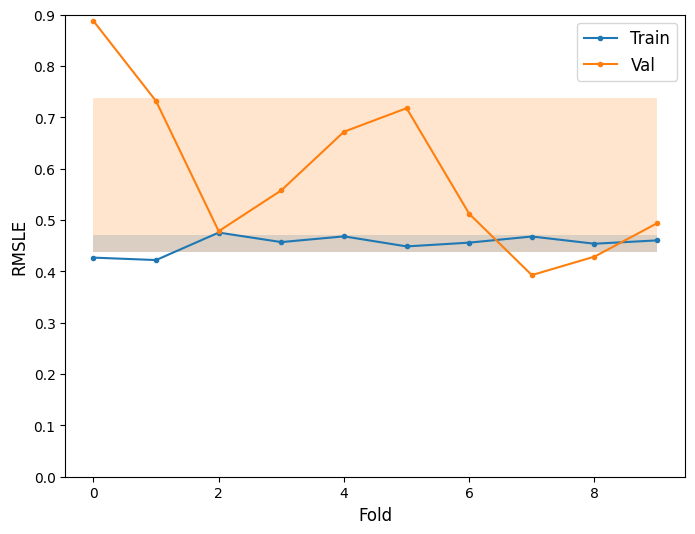

In [77]:
plt.figure(figsize=(8,6))

## Se grafican los valores de RMSLE de entrenamiento y validación
plt.plot( rmsle_train4 , '.-',color='tab:blue',label='Train')
plt.plot( rmsle_val4 , '.-',color='tab:orange',label='Val')

## Se grafica la media y desviación etándar
plt.fill_between(np.arange(10), mean_rmsle_train4 + std_rmsle_train4, mean_rmsle_train4 - std_rmsle_train4, alpha=0.2)
plt.fill_between(np.arange(10), mean_rmsle_val4 + std_rmsle_val4, mean_rmsle_val4 - std_rmsle_val4, alpha=0.2)

plt.xlabel('Fold',fontsize='large')
plt.ylabel('RMSLE',fontsize='large')
plt.legend(fontsize='large')
plt.ylim([0,0.9])
plt.show()

## Parte 7 - Custom Transformers 

- Construir un *Custom Transformer* que extraiga las caracterísicas temporales, siguiendo el ejemplo del capítulo 2 del libro.

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


X7 = X_train.drop(columns='temp')

best_rf_params = {"n_estimators": 200, "max_depth": 10, "random_state": 2, 'min_samples_split': 15, 'min_samples_leaf':8}
best_xgb_params = {"n_estimators": 300, "learning_rate": 0.05, "random_state": 2}

rf_model = RandomForestRegressor(**best_rf_params)
xgb_model = XGBRegressor(**best_xgb_params)

voting_model = VotingRegressor(estimators=[
    ("random_forest", rf_model),
    ("xgboost", xgb_model)
])


pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Escalador opcional si hay features con diferentes escalas
    ("ensemble", voting_model)
])

score = cross_val_score(pipeline,X7,y_train,cv=4,n_jobs=-1,scoring=rmsle_scorer)
print(score.mean())


-0.6378414418623557


## Parte 8 - Generar un modelo

#### Objetivos:

 - Generar el mejor modelo posible. Se podrá explorar posibles mejoras en cualquiera de las siguientes etapas:

    - Parámetros óptimos del regresor.
    - Predicción de alquileres registered y casual por separado.
    - Separación de conjunto de Entrenamiento y Validación tomando en cuenta la generación del conjunto de Test del desafío.
    - Cambios en las características utilizadas. (Agregando o quitando alguna de ellas)

In [70]:
X3 = X_train.drop(columns=['temp','workingday'])
X3.columns.tolist()

['season', 'holiday', 'weather', 'atemp', 'windspeed', 'hour']

In [138]:

diccionario3 = {
    'max_depth': [5,8,10,12,15,20],
    'n_estimators' : [10,50,100,200,250,300,400],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 10, 15, 30]
    }


best_rf = RandomForestRegressor(n_jobs=-1,random_state=2)

grid_search3 = GridSearchCV(estimator=best_rf, param_grid=diccionario3, cv=5)

grid_search3.fit(X3, y_train)

best_model3 = grid_search3.best_estimator_
best_params3 = grid_search3.best_params_


In [139]:
print(df_train.columns)
print(best_params3)

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'windspeed', 'casual', 'registered', 'count', 'hour'],
      dtype='object')
{'max_depth': 8, 'min_samples_leaf': 15, 'min_samples_split': 2, 'n_estimators': 100}


In [149]:
y_casual = df_train['casual']
y_registered = df_train['registered']
X_casual = df_train.drop(columns=['count','casual','registered','holiday','season'])
X_registered = df_train.drop(columns=['count','casual','registered','holiday','season'])

In [150]:
score_casual = cross_validate(best_model3,X_casual,y_casual,cv=5,scoring=rmsle_scorer)
score_registered = cross_validate(best_model3,X_registered,y_registered,cv=5,scoring=rmsle_scorer)

In [151]:
print(score_casual['test_score'].mean()*-1)
print(score_registered['test_score'].mean()*-1)
print((score_casual['test_score'].mean()*-1 + score_registered['test_score'].mean()*-1)/2)

0.6815185978390905
0.6090436735462279
0.6452811356926592


In [140]:

best_xgb_params = {"n_estimators": 50, "learning_rate": 0.1, "random_state": 2}

rf_model = RandomForestRegressor(**best_params3)
xgb_model = XGBRegressor(**best_xgb_params)

voting_model = VotingRegressor(estimators=[
    ("random_forest", rf_model),
    ("xgboost", xgb_model)
])


pipeline = Pipeline([
    ("scaler", StandardScaler()), 
    ("ensemble", voting_model)
])



In [141]:
X1 = df_train.drop(columns=['count','casual','registered','season','holiday'])
y1 = df_train['count']

In [142]:
score_tot = cross_validate(pipeline,X1,y1,cv=5,scoring=rmsle_scorer)

In [143]:
print(score_tot['test_score'].mean()*-1)

0.556294733580433


## Parte 9 - Submit
Construir un *pipeline* para el estimador que consideren que tuvo mejor desempeño. El pre-procesamiento debe incluir la extracción de las nuevas características.

Subir los resultados del *pipeline* para los datos de *test*,  a la [página](https://www.kaggle.com/c/bike-sharing-demand/submissions) de la competencia.



*   ¿Cuánto fue el valor de RMSLE para el conjunto de test?
